## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
import tensorflow as tf

In [14]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [15]:
print("No of records in training set are :", x_train.shape[0])
print("No of records in test set are :", x_test.shape[0])

No of records in training set are : 60000
No of records in test set are : 10000


In [16]:
""

''

### Find dimensions of an image in the dataset

In [17]:
print(x_train[0].shape)
'\n' #Or
x_train.shape[1:3]

(28, 28)


(28, 28)

In [18]:
import pandas as pd
print("NO of classes are :", pd.value_counts(y_train))

NO of classes are : 9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
y_train=to_categorical(y_train, num_classes=10) #num_classes is option
y_test=to_categorical(y_test)

### Normalize both the train and test image data from 0-255 to 0-1

In [21]:
x_train=x_train.astype('float')
x_test=x_test.astype('float')
x_test/=255
x_train/=255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [22]:
x_train= x_train.reshape(x_train.shape[0],x_train.shape[1], x_train.shape[2],1)
x_test= x_test.reshape(x_test.shape[0],x_test.shape[1], x_test.shape[2],1)

### Import the necessary layers from keras to build the model

In [23]:
import numpy as np
import tensorflow.keras.models as models
import tensorflow.keras.losses as losses
import tensorflow.keras.optimizers as optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Reshape, Convolution2D, MaxPooling2D

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [24]:
model=models.Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

callback=EarlyStopping(monitor='loss',patience=5)

In [13]:
model.compile(optimizer='adam',loss=losses.categorical_crossentropy,metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, callbacks=[callback])

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3722 - accuracy: 0.8646
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2254 - accuracy: 0.9164
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1632 - accuracy: 0.9394
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1123 - accuracy: 0.9585
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0739 - accuracy: 0.9718
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0486 - accuracy: 0.9821
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0342 - accuracy: 0.9879
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0273 - accuracy: 0.9901
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0211 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.019

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [25]:
model=models.Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

callback=EarlyStopping(monitor='loss',patience=5)

model.compile(optimizer='adam',loss=losses.categorical_crossentropy,metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, callbacks=[callback])

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3903 - accuracy: 0.8598
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2577 - accuracy: 0.9053
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2113 - accuracy: 0.9202
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1825 - accuracy: 0.9322
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1518 - accuracy: 0.9430
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1301 - accuracy: 0.9511
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1149 - accuracy: 0.9567
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0981 - accuracy: 0.9629
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0842 - accuracy: 0.9686
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.071

In [ ]:
After adding (2,2) maxpool layer and drop out layers model accuracy has dropped by 2%. Drop out layer is used to avoid overfitting.

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen= ImageDataGenerator(horizontal_flip=True,
                            rotation_range=45,
                            width_shift_range=.2,
                            height_shift_range=0.2,
                            shear_range=.2,
                            zoom_range=0.2)
model.fit_generator(datagen.flow(x_train, y_train, batch_size=3000),validation_data=(x_test,y_test), steps_per_epoch=len(x_train)//3000, epochs=10, callbacks=[callback])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
20/20 [==============================] - 12s 597ms/step - loss: 2.8927 - accuracy: 0.2388 - val_loss: 1.4177 - val_accuracy: 0.6263
Epoch 2/10
20/20 [==============================] - 12s 605ms/step - loss: 1.9788 - accuracy: 0.2984 - val_loss: 0.8875 - val_accuracy: 0.7236
Epoch 3/10
20/20 [==============================] - 12s 605ms/step - loss: 1.5860 - accuracy: 0.4269 - val_loss: 0.7501 - val_accuracy: 0.7445
Epoch 4/10
20/20 [==============================] - 12s 605ms/step - loss: 1.3285 - accuracy: 0.5167 - val_loss: 0.6899 - val_accuracy: 0.7723
Epoch 5/10
20/20 [==============================] - 12s 610ms/step - loss: 1.1569 - accuracy: 0.5801 - val_loss: 0.6488 - val_accuracy: 0.7819
Epoch 6/10
20/20 [==============================] - 12s 616ms/step - loss: 1.0454 - accuracy: 0.6201 - val_loss: 0.6607 - val_accuracy: 0.7738
Epoch 7/10
20/20 [==============================] - 12s 609ms/step

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

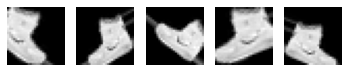

In [28]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [29]:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=3000),validation_data=(x_test,y_test), steps_per_epoch=len(x_train)//3000, epochs=10, callbacks=[callback])

Epoch 1/10
20/20 [==============================] - 12s 616ms/step - loss: 0.8534 - accuracy: 0.6881 - val_loss: 0.6111 - val_accuracy: 0.7812
Epoch 2/10
20/20 [==============================] - 12s 624ms/step - loss: 0.8395 - accuracy: 0.6933 - val_loss: 0.6147 - val_accuracy: 0.7836
Epoch 3/10
20/20 [==============================] - 13s 630ms/step - loss: 0.8160 - accuracy: 0.7019 - val_loss: 0.6435 - val_accuracy: 0.7726
Epoch 4/10
20/20 [==============================] - 13s 627ms/step - loss: 0.8120 - accuracy: 0.7054 - val_loss: 0.6005 - val_accuracy: 0.7896
Epoch 5/10
20/20 [==============================] - 12s 617ms/step - loss: 0.7971 - accuracy: 0.7106 - val_loss: 0.6452 - val_accuracy: 0.7737
Epoch 6/10
20/20 [==============================] - 12s 599ms/step - loss: 0.7932 - accuracy: 0.7104 - val_loss: 0.5962 - val_accuracy: 0.7916
Epoch 7/10
20/20 [==============================] - 12s 600ms/step - loss: 0.7795 - accuracy: 0.7147 - val_loss: 0.5929 - val_accuracy: 0.7900

###  Report the final train and validation accuracy

In [30]:
model.evaluate(x_train, y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.5337 - accuracy: 0.8062


[0.5336806774139404, 0.8062000274658203]

In [31]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5848 - accuracy: 0.7927


[0.5848495960235596, 0.7926999926567078]

Train and test accuracy values are very close to each other. Hence, there is no scope for overfitting the model. However score can be improved by changing the model architecture

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [59]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### **Load CIFAR10 dataset**

In [60]:
from tensorflow.keras.datasets import cifar10
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar)= cifar10.load_data()

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [64]:
datagen_cifar=ImageDataGenerator(rotation_range=30,horizontal_flip=True, vertical_flip=True, width_shift_range=.3, height_shift_range=.2)

### **Prepare/fit the generator.**

In [65]:
datagen_cifar.fit(x_train_cifar)

In [67]:
x_train_cifar=x_train_cifar.astype(float)
x_train_cifar/=255

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

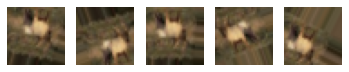

In [89]:
#from matplotlib import pyplot as plt
gen = datagen_cifar.flow(x_train_cifar[3:4], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()